In [4]:
# Setting up a dataset.
import pandas as pd
import lightgbm as lgb
feature_data = pd.read_csv("../datasets/EFIGI_SIFT_feature_data.csv")
train_features = feature_data.iloc[:, 2:257]
train_labels = feature_data["label"]
train_dataset = lgb.Dataset(train_features, label=train_labels)

In [5]:
feature_data

,pgc_id,SIFT_0,SIFT_1,SIFT_2,SIFT_3,SIFT_4,SIFT_5,SIFT_6,SIFT_7,SIFT_8,...,SIFT_247,SIFT_248,SIFT_249,SIFT_250,SIFT_251,SIFT_252,SIFT_253,SIFT_254,SIFT_255,label
0,PGC0000212,6.0,1.0,0.0,0.0,0.0,0.0,2.0,24.0,3.0,...,1.0,1.0,1.0,1.0,9.0,15.0,4.0,3.0,3.0,2
1,PGC0000218,16.0,6.0,1.0,0.0,0.0,1.0,2.0,19.0,3.0,...,0.0,0.0,0.0,12.0,46.0,4.0,0.0,0.0,0.0,2
2,PGC0000243,11.0,0.0,0.0,0.0,0.0,0.0,7.0,72.0,2.0,...,0.0,0.0,0.0,9.0,62.0,22.0,0.0,0.0,0.0,1
3,PGC0000255,19.0,0.0,0.0,0.0,0.0,1.0,7.0,19.0,3.0,...,0.0,0.0,1.0,6.0,20.0,9.0,0.0,0.0,0.0,2
4,PGC0000281,5.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,9.0,...,76.0,36.0,2.0,8.0,3.0,1.0,3.0,70.0,82.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453,PGC0072806,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2
4454,PGC0072922,9.0,0.0,0.0,0.0,0.0,0.0,14.0,33.0,1.0,...,0.0,0.0,2.0,3.0,14.0,28.0,0.0,0.0,0.0,2
4455,PGC0072927,25.0,4.0,2.0,1.0,5.0,2.0,5.0,21.0,16.0,...,0.0,2.0,1.0,16.0,49.0,33.0,4.0,2.0,4.0,2
4456,PGC0072930,3.0,0.0,0.0,0.0,0.0,0.0,5.0,36.0,1.0,...,0.0,0.0,0.0,5.0,36.0,4.0,0.0,0.0,0.0,2


In [6]:
train_features

,SIFT_1,SIFT_2,SIFT_3,SIFT_4,SIFT_5,SIFT_6,SIFT_7,SIFT_8,SIFT_9,SIFT_10,...,SIFT_246,SIFT_247,SIFT_248,SIFT_249,SIFT_250,SIFT_251,SIFT_252,SIFT_253,SIFT_254,SIFT_255
0,1.0,0.0,0.0,0.0,0.0,2.0,24.0,3.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,9.0,15.0,4.0,3.0,3.0
1,6.0,1.0,0.0,0.0,1.0,2.0,19.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,12.0,46.0,4.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,7.0,72.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,62.0,22.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,7.0,19.0,3.0,0.0,0.0,...,0.0,0.0,0.0,1.0,6.0,20.0,9.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,8.0,9.0,0.0,0.0,...,107.0,76.0,36.0,2.0,8.0,3.0,1.0,3.0,70.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4454,0.0,0.0,0.0,0.0,0.0,14.0,33.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,3.0,14.0,28.0,0.0,0.0,0.0
4455,4.0,2.0,1.0,5.0,2.0,5.0,21.0,16.0,1.0,1.0,...,0.0,0.0,2.0,1.0,16.0,49.0,33.0,4.0,2.0,4.0
4456,0.0,0.0,0.0,0.0,0.0,5.0,36.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,36.0,4.0,0.0,0.0,0.0


In [2]:
sys.path.append("../../galaxy_computer_vision_with_EFIGI_data")

In [3]:
# Cross validate and show scores
# using the scikit API for LGBM

from galaxyquest.gbm.GBM import GBM
gbm_model = GBM("../datasets/EFIGI_SIFT_feature_data.csv")
gbm_model.cross_validate(5)

{'fit_time': array([1.63691092, 1.70761609, 1.4422493 , 1.47227192, 1.75717187]),
 'score_time': array([0.0419991 , 0.026999  , 0.03500223, 0.04100275, 0.03600144]),
 'test_accuracy': array([0.74439462, 0.75224215, 0.7455157 , 0.74859708, 0.74298541]),
 'test_log_loss': array([1.17174112, 1.0985662 , 1.15063671, 1.14376191, 1.19282652])}

Initial training accuracy is ~74% per fold, indicating a model with room for improvement.

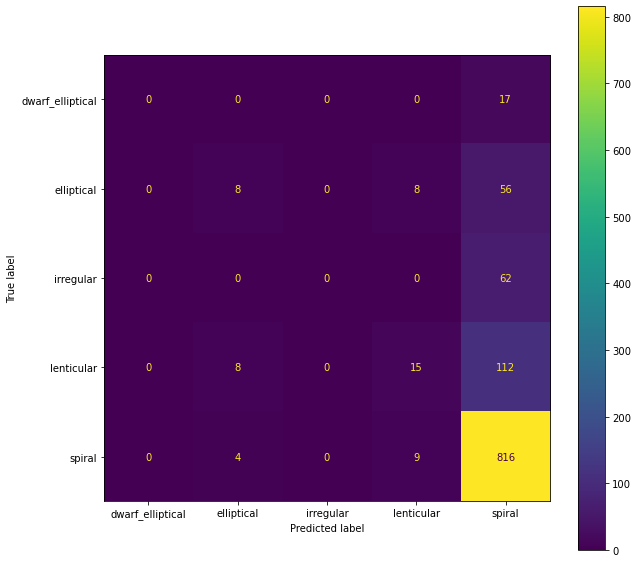

In [3]:
# Use our GBM api to plot a confusion matrix on the non-thresholded data.
from galaxyquest.gbm.GBM import GBM
gbm_model = GBM("../datasets/EFIGI_SIFT_feature_data.csv")
gbm_model.plot_confusion_matrix()